# Fashion MNIST: Image Classification with CNN using Tensorflow 2

#### By Asmath Ruhi


<img src="https://appliedmachinelearning.files.wordpress.com/2018/12/Fashion_MNIST_samples.png?w=640"> 

                                                                                        
                                                                         
                                            

## Introduction:

**Image Classification** is the process of categorizing a group of pixels and assigning appropriate labels to them, based on their characteristics. This is popularly accomplished by Deep Learning Algorithms.

The main objective of this notebook is to classify images of clothing items, using **Convolutional Neural Networks(CNN)**, with a high level of accuracy.

## The Dataset

**Fashion-MNIST** is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot




## Importing Libraries

For this problem, I will be using Tensorflow 2, which is an open source ML library, used mainly for Deep Learning.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Loading the Dataset 

In [2]:
# The fashion MNIST data is stored in 4 numpy arrays in Tensorflow datasets
# The default split is 60,000 training points and 10,000 testing points

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() #loading the data

#reshaping the inputs to have a single color channel i.e.grayscale
x_train = x_train.reshape([x_train.shape[0], 28 ,28 ,1])
x_test = x_test.reshape([x_test.shape[0], 28, 28, 1])

In [3]:
#checking the shape of the training and testing sets

print("Shape of training data:\n\t- X_train:" + str(x_train.shape) + "\n\t- Y_train:" + str(y_train.shape))
print("\nShape of test data:\n\t- X_test:" + str(x_test.shape) + "\n\t- Y_test:" + str(y_test.shape))

Shape of training data:
	- X_train:(60000, 28, 28, 1)
	- Y_train:(60000,)

Shape of test data:
	- X_test:(10000, 28, 28, 1)
	- Y_test:(10000,)


## Visualizing the Data

Let's have a look at a few images in the dataset. I'm using Matplotlib to plot the images, which is an open source data visualization library.

In [4]:
import matplotlib.pyplot as plt

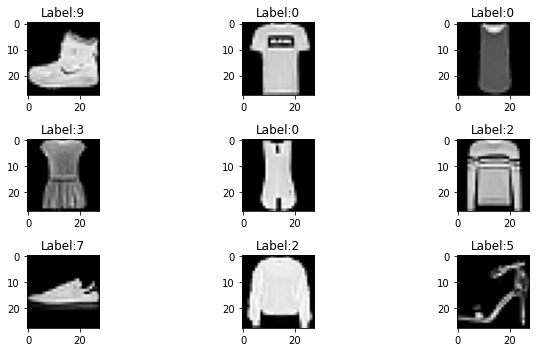

In [5]:
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,5)) #creating subplots with 3 rows and 3 columns

for i in range(9):                   # displaying 9 images
    ax = axes[i//3, i%3]
    ax.imshow(x_train[i], cmap='gray')  
    ax.set_title(f'Label:{y_train[i]}')
plt.tight_layout()                   #spacing out the subplots
plt.show()

## Scaling the data

Image data must be prepared before it can be used as the basis for modeling in image classification tasks.
I'm going to preprocess the data by scaling the images/inputs in the dataset:

In [6]:
# Each image is a 28 x 28 grayscale, having values ranging from 0-255. 
# Simple scaling by dividing each value by the highest value i.e. 255.

x_train_scaled = x_train.astype('float32') / 255.0  
x_test_scaled = x_test.astype('float32') / 255.0

## Splitting the data into Train, Validation and Test sets

In order to evaluate the Models performance effectively, and prevent overfitting, I will be splitting the data into 3 parts:

- Training Set 
- Validation Set
- Testing Set

The data is split by default into Training (60,000) and Testing (10,000) sets. I will do a custom split by taking 10% of the training data as Validation, by using Sklearn's Train_test_split functionality. This will also shuffle the data randomly.


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#concatenating the train and test sets, doing a custom split 
X = np.concatenate([x_train_scaled, x_test_scaled])
Y = np.concatenate([y_train, y_test])

In [9]:
x, x_test, y, y_test = train_test_split(X, Y, test_size=10000, random_state=42)

#taking 10% of training data as validation data
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=int(x.shape[0]*0.1), random_state=42)

In [10]:
#checking the shape of the training, validation & testing sets

print("Shape of training data:\n\t- X_train:" + str(x_train.shape) + "\n\t- Y_train:" + str(y_train.shape))
print("\nShape of Validation data:\n\t- X_valid:" + str(x_valid.shape) + "\n\t- Y_valid:" + str(y_valid.shape))
print("\nShape of test data:\n\t- X_test:" + str(x_test.shape) + "\n\t- Y_test:" + str(y_test.shape))

Shape of training data:
	- X_train:(54000, 28, 28, 1)
	- Y_train:(54000,)

Shape of Validation data:
	- X_valid:(6000, 28, 28, 1)
	- Y_valid:(6000,)

Shape of test data:
	- X_test:(10000, 28, 28, 1)
	- Y_test:(10000,)


## Outlining the Model

Using Tensorflow 2, I'm going to outline a Convolutional Neural Network for classifiying the Fashion MNIST dataset.

I'm going to build a **Sequential** Model, and stack the following layers:

- **Convolutional Layer**: 32 filters of 3x3 size, with ReLU activation function, and initializing normally distributed weights for the filters
- **Pooling Layer**: 2x2 pool size for downsizing the image
- **Dropout Layer**: To prevent overfitting the CNN, I'm going to use a dropout rate of 0.2
- **Convolutional Layer**: 64 filters of 3x3 size, with ReLU activation function
- **Pooling Layer**: 2x2 pool size for downsizing the image
- **Dropout Layer**: Dropout rate of 0.2
- **Convolutional Layer**: 128 filters of 3x3 size, with ReLU activation function
- **Dropout Layer**:  I'm going to use a dropout rate of 0.5 in this layer
- **Flattening** the input
- **Fully connected Layer** with ReLU activation
- **Output Layer** with Softmax Activation 

In [11]:
output_size = 10 # There are 10 classes of clothing items

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

For the optimization process, I will be using:
- **ADAM** optimization algorithm, which is an adaptive LRS, specifically for deep NN's
- **Loss Function**: As I did not one-hot encode the targets/labels earlier, I will use sparse_categorical crossentropy, which will do the same to the targets

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training the Model

Now, I will train the model for 10 Epochs, and a batch size of 128:

In [14]:
EPOCHS = 10

history = model.fit(x=x_train ,y=y_train, batch_size=128, epochs=EPOCHS, validation_data=(x_valid,y_valid), validation_steps=1, verbose=2)

Epoch 1/10
422/422 - 23s - loss: 0.6912 - accuracy: 0.7380 - val_loss: 0.4132 - val_accuracy: 0.8359
Epoch 2/10
422/422 - 22s - loss: 0.4372 - accuracy: 0.8381 - val_loss: 0.3728 - val_accuracy: 0.8672
Epoch 3/10
422/422 - 22s - loss: 0.3730 - accuracy: 0.8636 - val_loss: 0.3065 - val_accuracy: 0.8828
Epoch 4/10
422/422 - 21s - loss: 0.3397 - accuracy: 0.8760 - val_loss: 0.2473 - val_accuracy: 0.8984
Epoch 5/10
422/422 - 24s - loss: 0.3153 - accuracy: 0.8836 - val_loss: 0.2995 - val_accuracy: 0.8906
Epoch 6/10
422/422 - 22s - loss: 0.2987 - accuracy: 0.8905 - val_loss: 0.2561 - val_accuracy: 0.9062
Epoch 7/10
422/422 - 24s - loss: 0.2865 - accuracy: 0.8956 - val_loss: 0.2382 - val_accuracy: 0.9297
Epoch 8/10
422/422 - 24s - loss: 0.2781 - accuracy: 0.8974 - val_loss: 0.2186 - val_accuracy: 0.9219
Epoch 9/10
422/422 - 21s - loss: 0.2696 - accuracy: 0.9008 - val_loss: 0.2325 - val_accuracy: 0.9141
Epoch 10/10
422/422 - 21s - loss: 0.2597 - accuracy: 0.9043 - val_loss: 0.2375 - val_accura

## Model Evaluation: Training Loss and Validation Loss and Accuracy

Let's plot the training and validation loss, to visualize how our model performed:

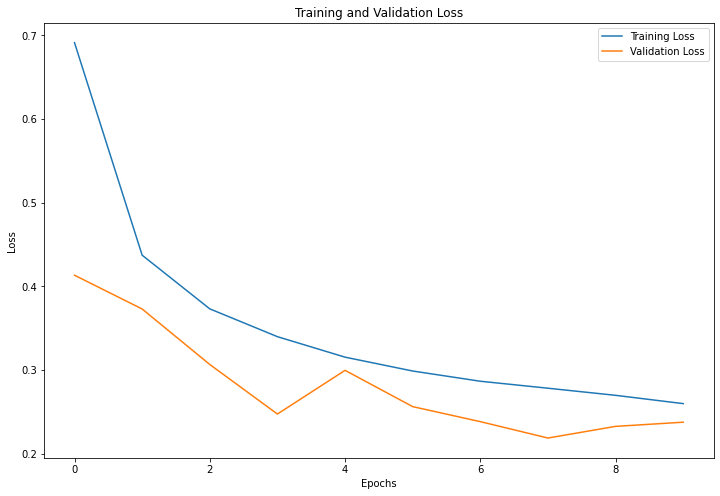

In [19]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

The training and validation loss are decreasing with each subsequent epoch, and are very close at 10 epochs. If we trained the model for more than 10 epochs, the validation loss would rise and model would start overfitting.

Let's plot the training and validation Accuracy, to visualize how our model performed:

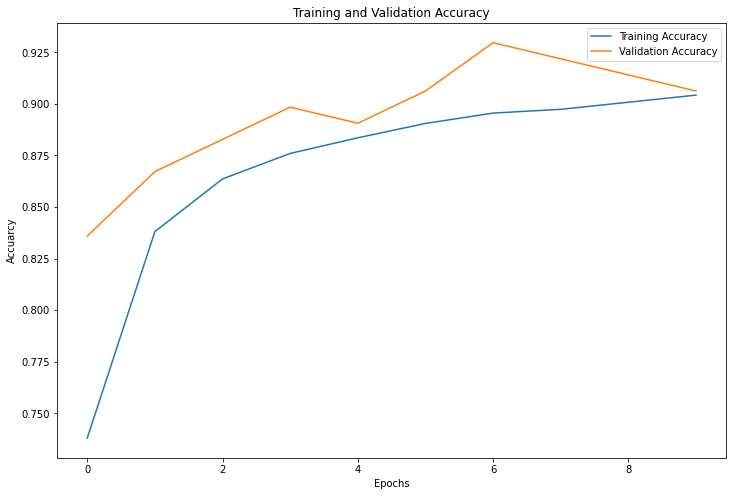

In [21]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

As you can observe above, the validation accuracy has almost converged with the Training accuracy at 10 Epochs.

## Testing the Model

Finally, let's see how the model performs on test data:

In [22]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2372 - accuracy: 0.9133


The test accuracy & loss are very close to the validation accuracy and loss, which means that our model performs well on new data, without overfitting.


In [30]:
print(f"Testing Performance:\n\t-Accuracy: {test_accuracy}\n\t-Loss: {test_loss}")
print(f"Validation Performance:\n\t-Accuracy: {0.9062}\n\t-Loss: {0.2375}")

Testing Performance:
	-Accuracy: 0.9132999777793884
	-Loss: 0.2372092455625534
Validation Performance:
	-Accuracy: 0.9062
	-Loss: 0.2375
